# Khushi Prakash Desarda
# BEITA121
# LP-IV Assignment 2

### Title of Assignment 2 :-
Implementing Feedforward neural networks with Keras and TensorFlow
a. Import the necessary packages
b. Load the training and testing data (MNIST)
c. Define the network architecture using Keras
d. Train the model using SGD
e. Evaluate the network
f. Plot the training loss and accuracy

### Importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

### Loading and preparing the data
MNIST stands for “Modified National Institute of Standards and Technology”. It is a dataset of 70,000 handwritten images. Each image is of 28x28 pixels i.e. about 784 features. Each feature represents only one pixel’s intensity i.e. from 0(white) to 255(black). This database is further divided into 60,000 training and 10,000 testing images.

In [2]:
#import dataset and split into train and test data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#to see length of training dataset
len(x_train)

60000

In [4]:
#to see length of testing dataset
len(x_test)

10000

In [5]:
#shape of training dataset  60,000 images having 28*28 size
x_train.shape

(60000, 28, 28)

In [6]:
#shape of testing dataset  10,000 images having 28*28 size
x_test.shape

(10000, 28, 28)

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

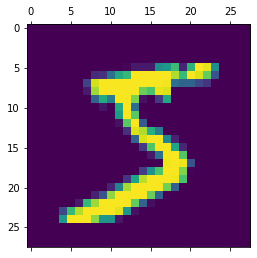

In [8]:
#to see how first image look
plt.matshow(x_train[0])

In [9]:
#normalize the images by scaling pixel intensities to the range 0,1

x_train = x_train / 255
x_test = x_test / 255

In [10]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Define the network architecture using Keras


### Creating the model
The ReLU function is one of the most popular activation functions. It stands for “rectified linear unit”. Mathematically this function is defined as: y = max(0,x)The ReLU function returns “0” if the input is negative and is linear if the input is positive.

The softmax function is another activation function. It changes input values into values that reach from 0 to 1.

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [13]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [14]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.6439 - accuracy: 0.8390 - val_loss: 0.3632 - val_accuracy: 0.8999
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3414 - accuracy: 0.9044 - val_loss: 0.2993 - val_accuracy: 0.9156
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2954 - accuracy: 0.9169 - val_loss: 0.2692 - val_accuracy: 0.9257
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2662 - accuracy: 0.9248 - val_loss: 0.2444 - val_accuracy: 0.9323
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2425 - accuracy: 0.9325 - val_loss: 0.2270 - val_accuracy: 0.9371
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2230 - accuracy: 0.9375 - val_loss: 0.2087 - val_accuracy: 0.9401
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2063 - accuracy: 0.9423 - val_loss: 0.1956 - val_accuracy:

### Evaluate the model

In [15]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1639 - accuracy: 0.9519
Loss=0.164
Accuracy=0.952


### Making Prediction on New Data

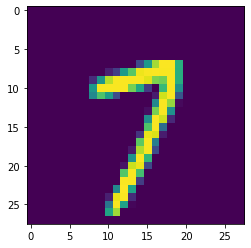

In [16]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [17]:
#we use predict() on new data
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 3ms/step
Handwritten number in the image is= 7


### Plot graph for Accuracy and Loss

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

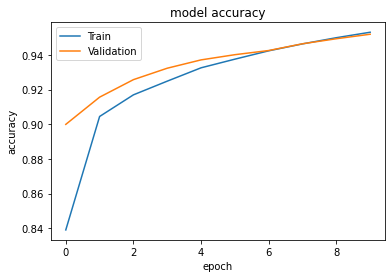

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

graph representing the model’s accuracy

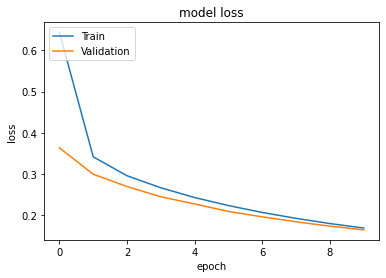

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

graph represents the model’s loss

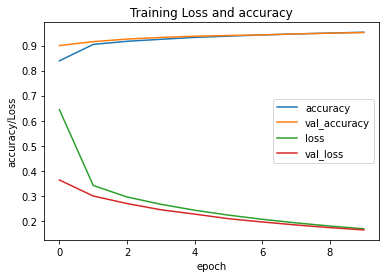

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()

Conclusion: With above code We can see, that throughout the epochs, our model accuracy increases and our model loss decreases,that is good since our model gains confidence with its predictions.

1. The two losses (loss and val_loss) are decreasing and the accuracy 
   (accuracy and val_accuracy)are increasing. 
    So this indicates the model is trained in a good way.

2. The val_accuracy is the measure of how good the predictions of your model are. 
   So In this case, it looks like the model is well trained after 10 epochs

### Save the model

In [22]:
keras_model_path='C:\\Users\\DELL'
model.save(keras_model_path)

INFO:tensorflow:Assets written to: C:\Users\DELL\assets


In [23]:
#use the save model
restored_keras_model = tf.keras.models.load_model(keras_model_path)